In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']



In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-15,171.699997,169.750000,171.250000,170.419998,24626800.0,168.218201
2019-02-19,171.440002,169.490005,169.710007,170.929993,18972800.0,168.721588
2019-02-20,173.320007,170.990005,171.190002,172.029999,26114400.0,169.807388
2019-02-21,172.369995,170.300003,171.800003,171.059998,17249700.0,168.849930
2019-02-22,173.000000,171.380005,171.580002,172.970001,18913200.0,170.735229
...,...,...,...,...,...,...
2020-02-10,321.549988,313.850006,314.179993,321.549988,27337200.0,321.549988
2020-02-11,323.899994,318.709991,323.600006,319.609985,23580800.0,319.609985
2020-02-12,327.220001,321.470001,321.470001,327.200012,28432600.0,327.200012


In [10]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-15,1131.670044,1110.650024,1130.079956,1113.650024,1449800,1113.650024
2019-02-19,1121.890015,1110.000000,1110.000000,1118.560059,1046400,1118.560059
2019-02-20,1123.410034,1105.280029,1119.989990,1113.800049,1087800,1113.800049
2019-02-21,1111.939941,1092.520020,1110.839966,1096.969971,1415100,1096.969971
2019-02-22,1111.239990,1095.599976,1100.900024,1110.369995,1049500,1110.369995


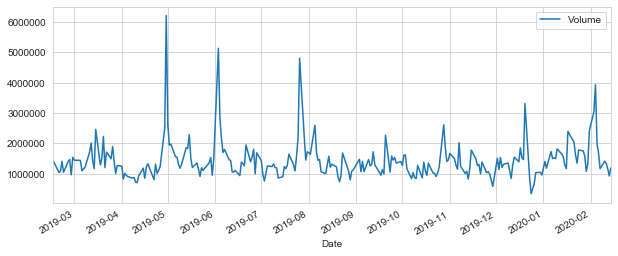

In [11]:
GOOG['Volume'].plot(legend=True, figsize=(10,4));

In [12]:
dir()

['AAPL',
 'AMZN',
 'DataFrame',
 'DataReader',
 'GOOG',
 'In',
 'MSFT',
 'Out',
 'Series',
 '_',
 '_10',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'datetime',
 'division',
 'end',
 'exit',
 'get_ipython',
 'np',
 'pd',
 'plt',
 'quit',
 'sns',
 'start',
 'stock',
 'tech_list']

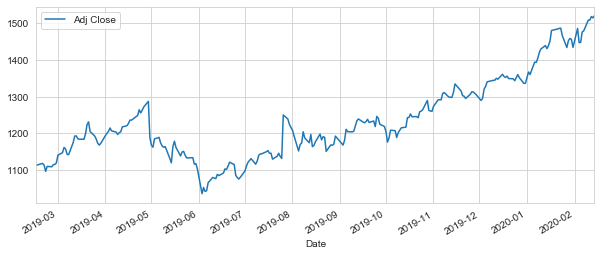

In [13]:
GOOG['Adj Close'].plot(legend = True, figsize = (10,4));

Moving Average:

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.DataFrame(AAPL['Adj Close']).rolling(ma).mean()

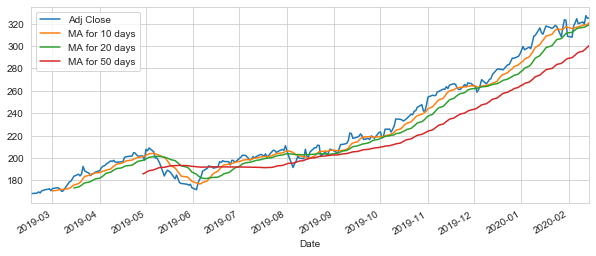

In [15]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4));

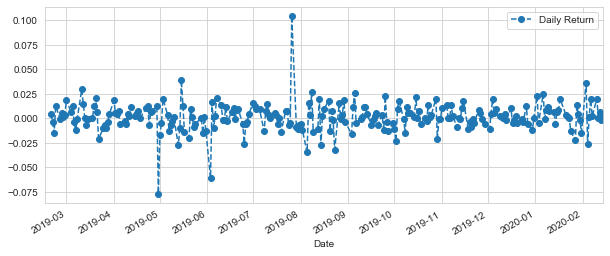

In [16]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(legend = True, figsize=(10,4), linestyle = '--', marker = 'o')

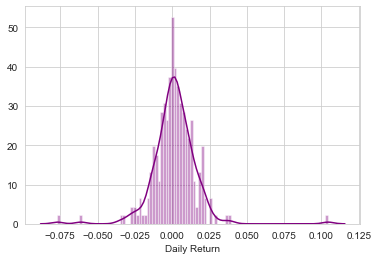

In [17]:
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color = 'purple')

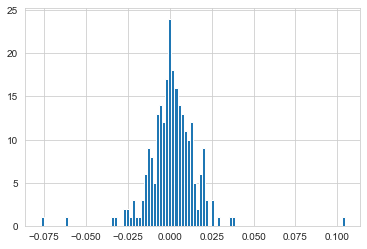

In [18]:
GOOG['Daily Return'].hist(bins = 100)

In [19]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [20]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-15,168.218201,1113.650024,106.643166,1607.949951
2019-02-19,168.721588,1118.560059,106.593895,1627.579956
2019-02-20,169.807388,1113.800049,106.039703,1622.099976
2019-02-21,168.849930,1096.969971,108.276283,1619.439941
2019-02-22,170.735229,1110.369995,109.820114,1631.560059


In [21]:
tech_rets = closing_df.pct_change()

In [22]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-15,NaN,NaN,NaN,NaN
2019-02-19,0.002992,0.004409,-0.000462,0.012208
2019-02-20,0.006435,-0.004255,-0.005199,-0.003367
2019-02-21,-0.005638,-0.015111,0.021092,-0.001640
2019-02-22,0.011166,0.012215,0.014258,0.007484


Correlation Analysis:

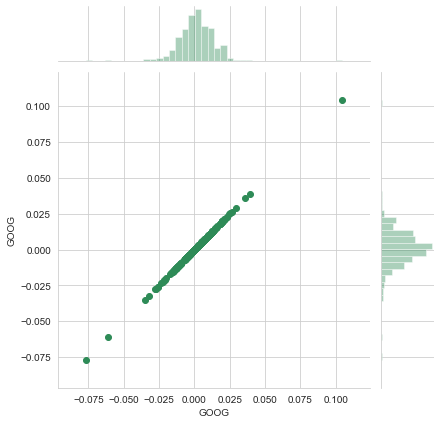

In [23]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen');

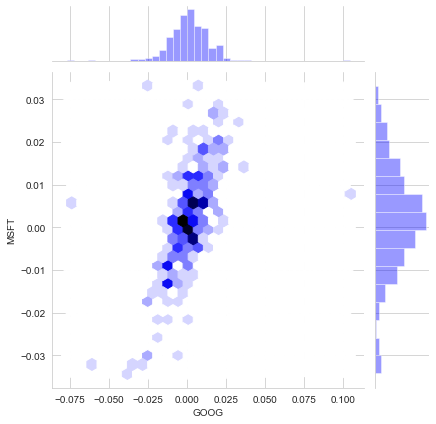

In [24]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'hex', color = 'blue');

In [25]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-15,NaN,NaN,NaN,NaN
2019-02-19,0.002992,0.004409,-0.000462,0.012208
2019-02-20,0.006435,-0.004255,-0.005199,-0.003367
2019-02-21,-0.005638,-0.015111,0.021092,-0.001640
2019-02-22,0.011166,0.012215,0.014258,0.007484


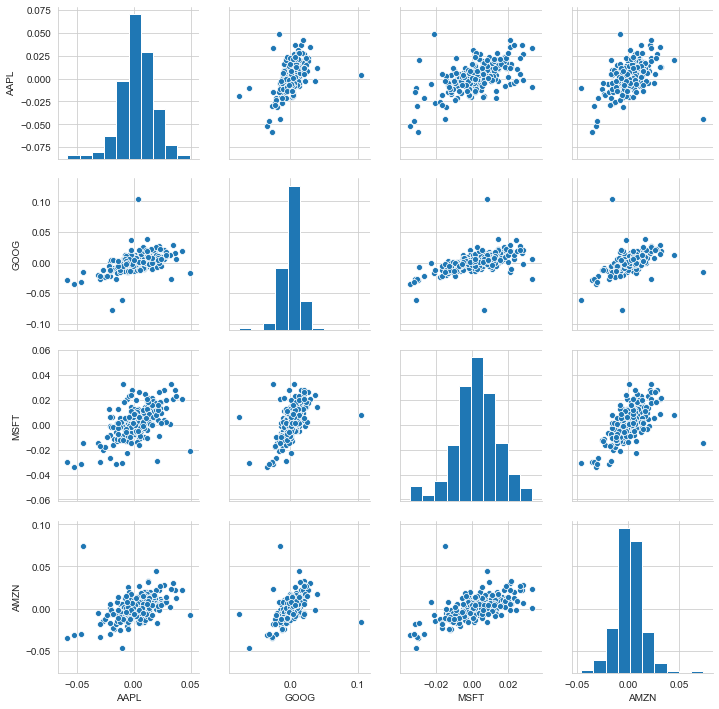

In [26]:
sns.pairplot(tech_rets.dropna())

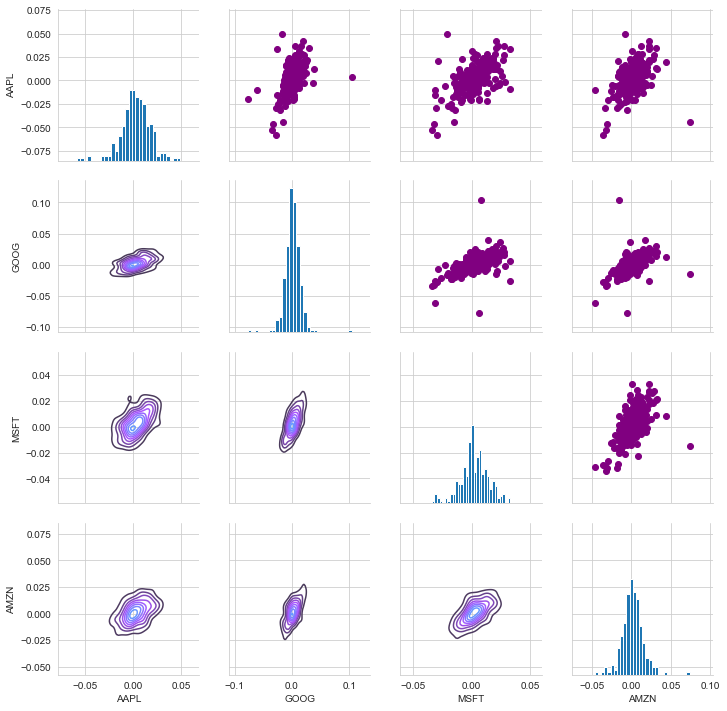

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins =30);

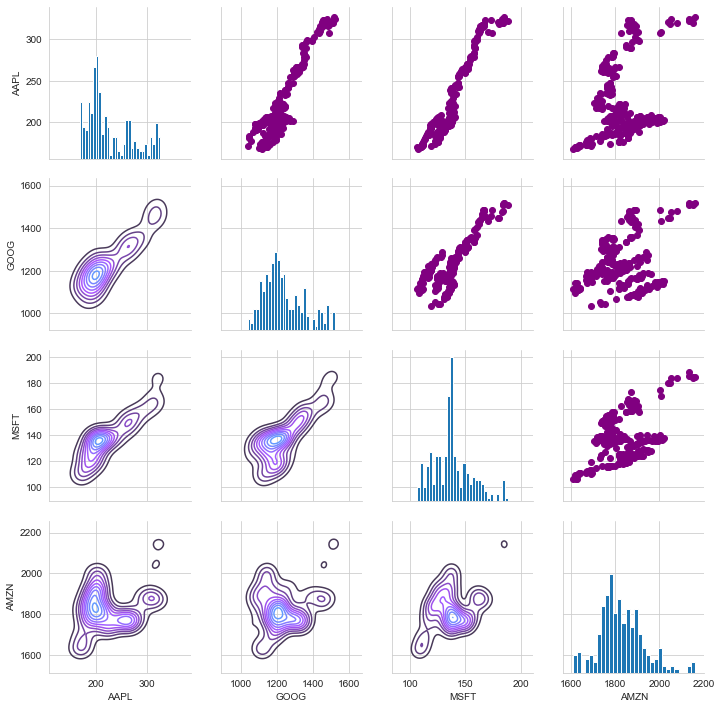

In [28]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins =30);

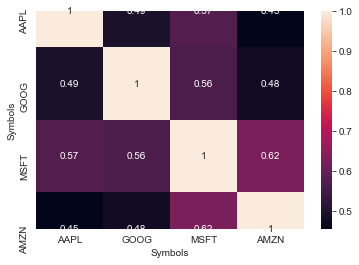

In [29]:
sns.heatmap(tech_rets.dropna().corr(), annot = True);

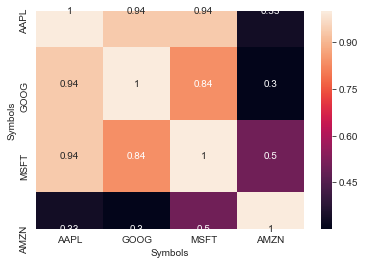

In [30]:
sns.heatmap(closing_df.corr(), annot = True);

Risk Analysis:

In [31]:
rets = tech_rets.dropna()

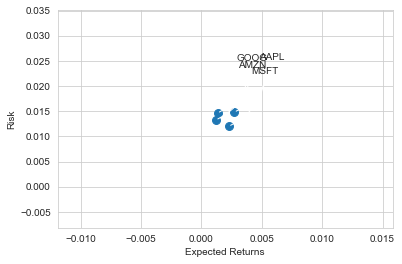

In [32]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y, in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
                xy = (x,y), xytext = (50, 50),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'));

Value at Risk using Bootstrap Method:

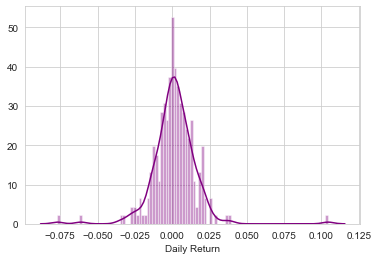

In [33]:
sns.distplot(GOOG['Daily Return'].dropna(), bins = 100, color = 'purple');

In [34]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-19,0.002992,0.004409,-0.000462,0.012208
2019-02-20,0.006435,-0.004255,-0.005199,-0.003367
2019-02-21,-0.005638,-0.015111,0.021092,-0.001640
2019-02-22,0.011166,0.012215,0.014258,0.007484
2019-02-25,0.007285,-0.000874,0.005587,0.000883


In [35]:
rets['AAPL'].quantile(0.05)            # 95% of the times AAPL's daily loss will not be more than 2.06%

-0.02066111272328125

In [36]:
rets['GOOG'].quantile(0.05)

-0.01867018948243837

Value at Risk using Monte Carlo Method:

In [37]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [38]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
        
        

In [39]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-02-15,1131.670044,1110.650024,1130.079956,1113.650024,1449800,1113.650024,NaN
2019-02-19,1121.890015,1110.000000,1110.000000,1118.560059,1046400,1118.560059,0.004409
2019-02-20,1123.410034,1105.280029,1119.989990,1113.800049,1087800,1113.800049,-0.004255
2019-02-21,1111.939941,1092.520020,1110.839966,1096.969971,1415100,1096.969971,-0.015111
2019-02-22,1111.239990,1095.599976,1100.900024,1110.369995,1049500,1110.369995,0.012215


Text(0.5, 1.0, 'Monte Carlo for Google')

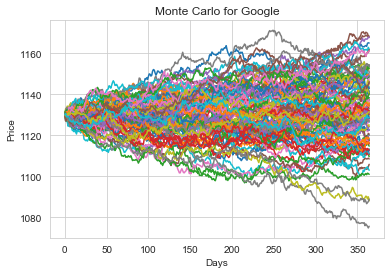

In [40]:
start_price = 1130.079956

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for Google')

In [41]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

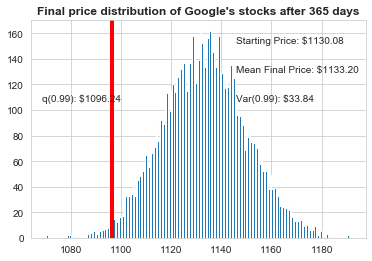

In [42]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Starting price:
plt.figtext(0.6, 0.8, s='Starting Price: $%.2f' %start_price)

# Mean ending price:
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% CI)
plt.figtext(0.6, 0.6, s='Var(0.99): $%.2f' %(start_price-q,))

# Display 1% Quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' %q)

# PLot a line at the 1% quantile result:
plt.axvline(x=q, linewidth=4, color='r')

# Title:
plt.title(u"Final price distribution of Google's stocks after %s days" %days, weight = 'bold');